# Subject
Our goal is to understand the dataset we deal with, and visualize the data it contains. Then, the objective will be to isolate the date and temperature columns for a chosen city (Melbourne), in order to build a model that predicts the temperature for a certain number of days.

## The Dataset
The dataset represents the weather in Australia, and contains various types of weather indicators for each day since 2009. It was taken from kaggle, at: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package.

## Basic methodology
In a first time, we will try to visualize some key metrics about the dataset and each feature. Then we will isolate what we want to work with, and fill or delete missing data.

In a second time, we will build a weather forecasting model using Facebook Prophet, in order to be able to predict the temperature for a chosen number of days.

Finally, we will visualize our predicted temperature values and their accuracy.

The librairies we will use are:
- pandas, numpy, seaborn, matplotlib for the basics
- Facebook Prophet for the machine learning model training.


## Suggested improvements: 
- Try on other city data

- Change the model to take into account more input features (for now we only take the date and the previous temperature)
.
- Change the data cleaning to fill out the missing values instead of cutting it out.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet

# Exploratory Data Analysis

In [3]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
melb = df[df['Location']=='Melbourne']
melb['Date'] = pd.to_datetime(melb['Date'])
melb.head()

C:\Users\louis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No


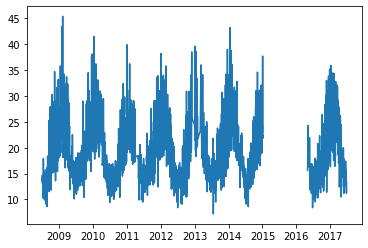

In [7]:
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

Some data is missing between 2015 and 2016. For now, we will just cut our dataset at 2015, and try to forecast with that.

C:\Users\louis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


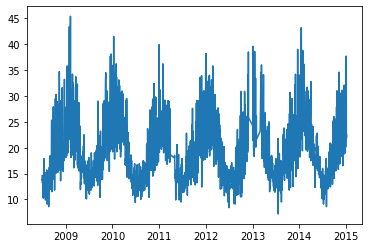

In [8]:
melb['Year'] = melb['Date'].apply(lambda x: x.year)
melb = melb[melb['Year']<=2015]
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

In [9]:
data = melb[['Date', 'Temp3pm']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

C:\Users\louis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6


# Model training

In [10]:
m = Prophet(interval_width=0.95, daily_seasonality=True)

In [12]:
model = m.fit(data)

C:\Users\louis\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


# Weather Forecasting

In [18]:
future = m.make_future_dataframe(periods=1000,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-07-01,15.555141,6.022838,21.711240,15.555141,15.555141,-1.747644,-1.747644,-1.747644,3.845634,...,0.218221,0.218221,0.218221,-5.811499,-5.811499,-5.811499,0.0,0.0,0.0,13.807497
1,2008-07-02,15.556045,5.499794,21.234303,15.556045,15.556045,-1.972187,-1.972187,-1.972187,3.845634,...,-0.010409,-0.010409,-0.010409,-5.807411,-5.807411,-5.807411,0.0,0.0,0.0,13.583858
2,2008-07-03,15.556949,5.804635,21.546847,15.556949,15.556949,-1.825515,-1.825515,-1.825515,3.845634,...,0.136420,0.136420,0.136420,-5.807569,-5.807569,-5.807569,0.0,0.0,0.0,13.731433
3,2008-07-04,15.557853,6.164269,21.828066,15.557853,15.557853,-1.892077,-1.892077,-1.892077,3.845634,...,0.073989,0.073989,0.073989,-5.811700,-5.811700,-5.811700,0.0,0.0,0.0,13.665776
4,2008-07-05,15.558756,5.730568,21.505094,15.558756,15.558756,-1.988938,-1.988938,-1.988938,3.845634,...,-0.015213,-0.015213,-0.015213,-5.819359,-5.819359,-5.819359,0.0,0.0,0.0,13.569818


# Result visualization

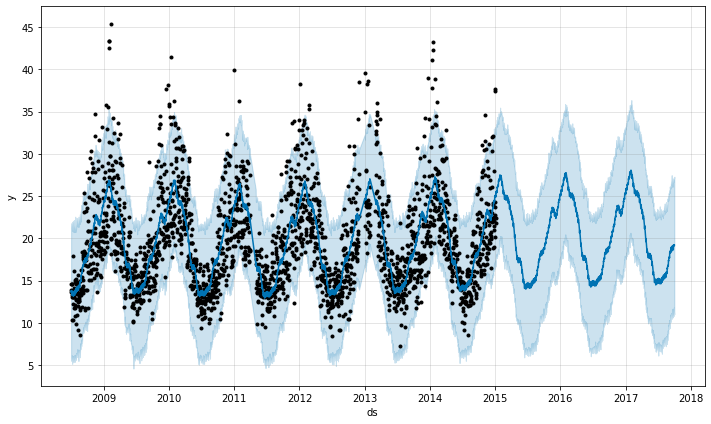

In [19]:
plot1 = m.plot(forecast)

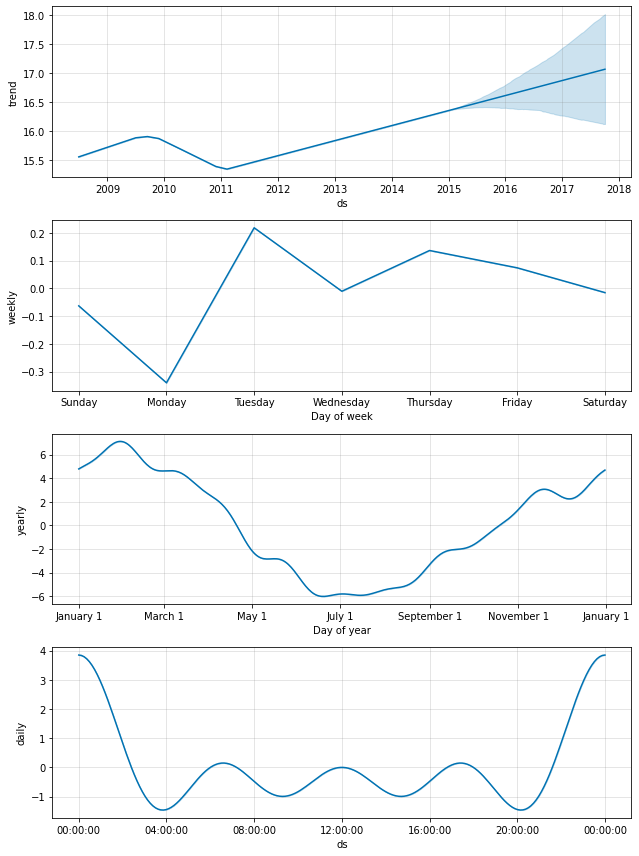

In [20]:
plt2 = m.plot_components(forecast)